In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input/shapes/valid/squares"))

['drawing(100).png', 'drawing(99).png', 'drawing(85).png', 'drawing(92).png', 'drawing(93).png', 'drawing(84).png', 'drawing(97).png', 'drawing(87).png', 'drawing(88).png', 'drawing(96).png', 'drawing(95).png', 'drawing(86).png', 'drawing(82).png', 'drawing(94).png', 'drawing(83).png', 'drawing(98).png', 'drawing(91).png', 'drawing(89).png', 'drawing(90).png']


In [2]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory('../input/shapes/train',target_size=(28,28),batch_size=32,
                                                    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory('../input/shapes/valid',target_size=(28,28),batch_size=32,
                                                        class_mode='categorical')

Found 243 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


In [5]:
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [7]:
classifier.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5",monitor = 'val_acc',verbose=1,save_best_only=True)

In [9]:
classifier.fit_generator(train_generator,steps_per_epoch = 100,epochs = 20, callbacks=[checkpointer],
                        validation_data = validation_generator,validation_steps = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
100/100 [==============================] - 6s 63ms/step - loss: 1.1026 - acc: 0.3257 - val_loss: 1.0986 - val_acc: 0.3333

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to best_weights.hdf5
Epoch 2/20
100/100 [==============================] - 4s 36ms/step - loss: 0.9700 - acc: 0.5196 - val_loss: 0.4490 - val_acc: 0.8596

Epoch 00002: val_acc improved from 0.33333 to 0.85965, saving model to best_weights.hdf5
Epoch 3/20
100/100 [==============================] - 4s 36ms/step - loss: 0.5985 - acc: 0.7479 - val_loss: 0.2117 - val_acc: 0.9474

Epoch 00003: val_acc improved from 0.85965 to 0.94737, saving model to best_weights.hdf5
Epoch 4/20
100/100 [==============================] - 4s 36ms/step - loss: 0.4006 - acc: 0.8360 - val_loss: 0.1683 - val_acc: 0.9298

Epoch 00004: val_acc did not improve from 0.94737
Epoch 5/20
100/100 [==============================] - 4s 36ms/step - loss: 0.3493 - acc: 0.8764 - val_

In [10]:
classifier.load_weights('best_weights.hdf5')

In [11]:
classifier.save('shape_ILViz.h5')

**prediction**

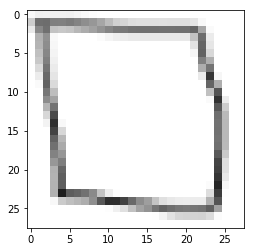

(1, 28, 28, 3)


In [12]:
img_path = '../input/shapes/valid/squares/drawing(100).png'
img = image.load_img(img_path, target_size=(28, 28))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [13]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [0]


**Intermediate Layer Viz**

In [14]:
layer_outputs = [layer.output for layer in classifier.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) 
# Creates a model that will return these outputs, given the model input

In [15]:
layer_outputs

[<tf.Tensor 'conv2d_1/Relu:0' shape=(?, 28, 28, 32) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 26, 26, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 13, 13, 32) dtype=float32>,
 <tf.Tensor 'dropout_1/cond/Merge:0' shape=(?, 13, 13, 32) dtype=float32>,
 <tf.Tensor 'conv2d_3/Relu:0' shape=(?, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_4/Relu:0' shape=(?, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'dropout_2/cond/Merge:0' shape=(?, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'conv2d_5/Relu:0' shape=(?, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'conv2d_6/Relu:0' shape=(?, 3, 3, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 1, 1, 64) dtype=float32>,
 <tf.Tensor 'dropout_3/cond/Merge:0' shape=(?, 1, 1, 64) dtype=float32>]

In [16]:
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
__________

In [17]:
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

In [18]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 32)


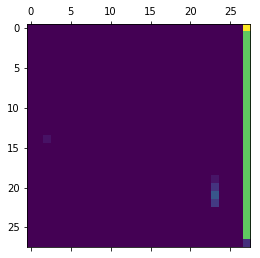

In [19]:
plt.matshow(first_layer_activation[0, :, :,3])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


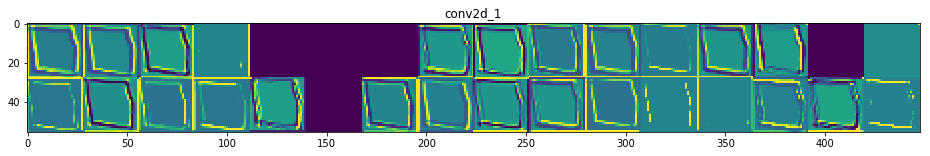

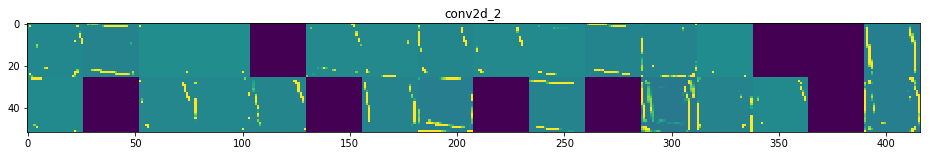

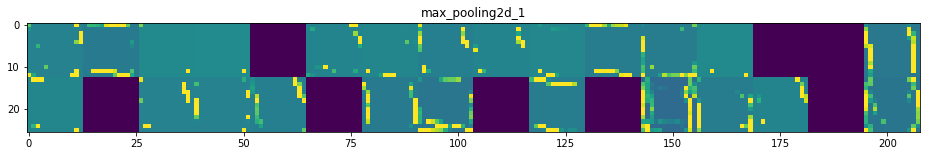

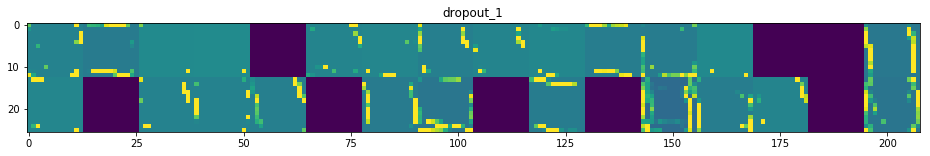

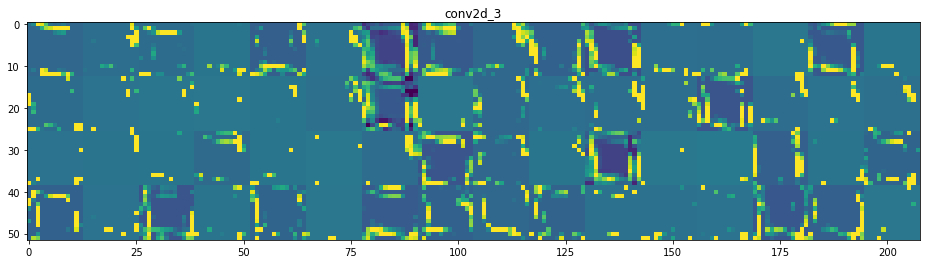

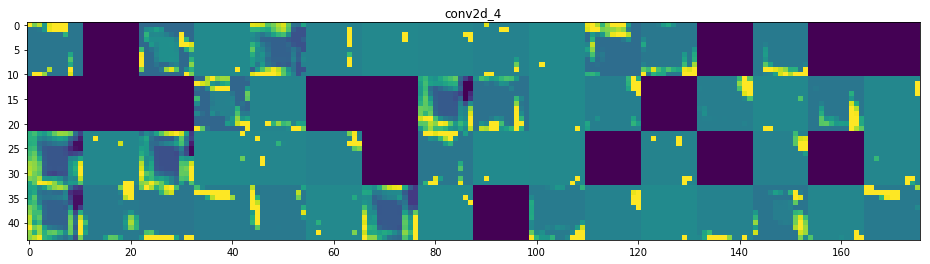

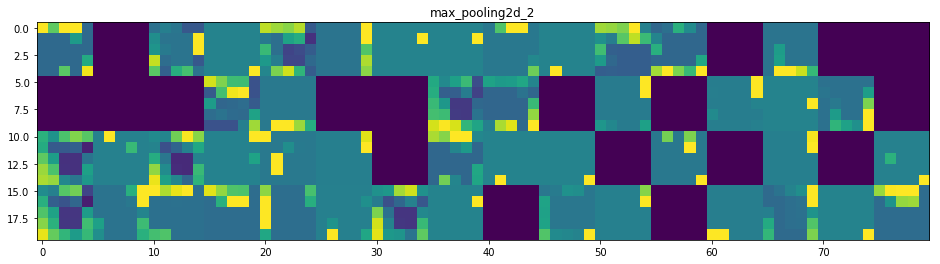

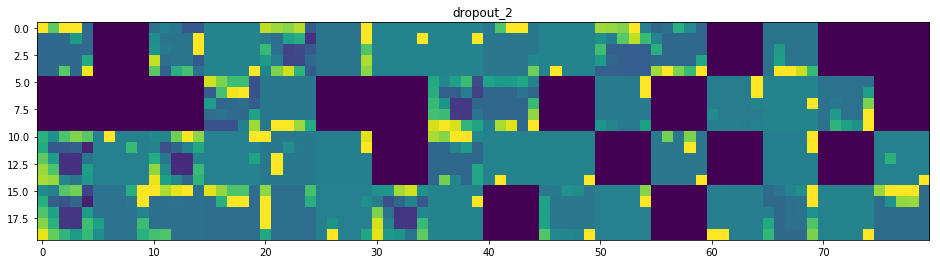

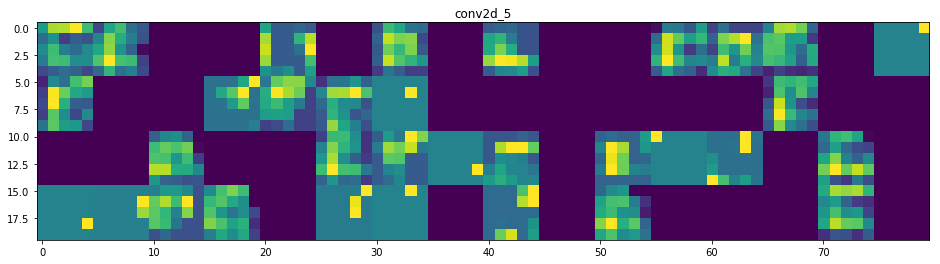

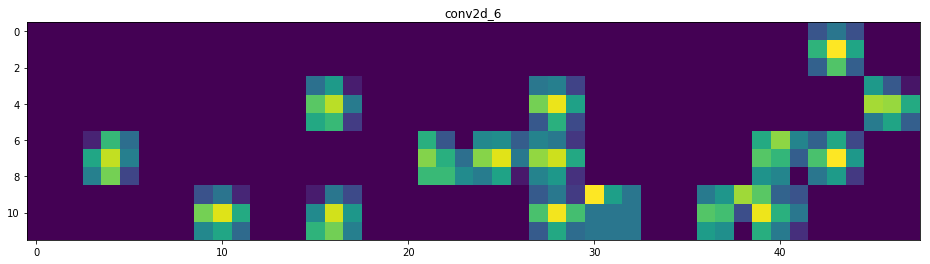

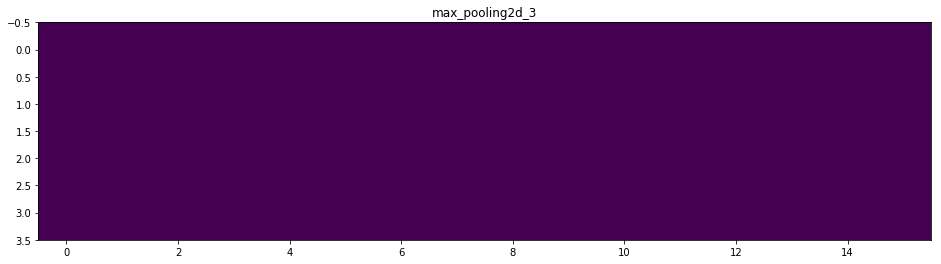

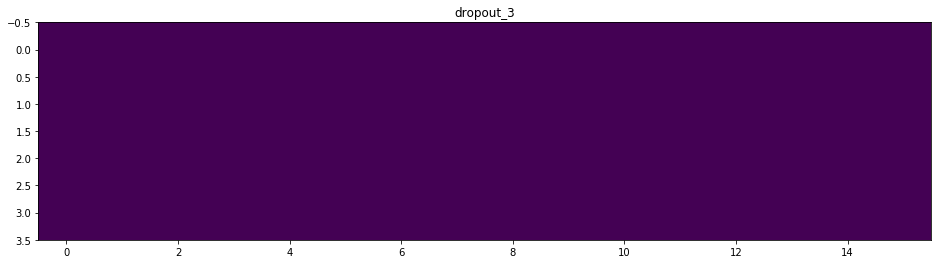

In [20]:
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')